In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None 
import numpy as np
import re
import nltk


In [3]:
pip install gensim


     ---------------------------------------- 24.0/24.0 MB 1.6 MB/s eta 0:00:00
     ---------------------------------------- 57.0/57.0 kB 1.5 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
from gensim.models import word2vec

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
#matplotlib inline

In [5]:
data = pd.read_csv('train.csv').sample(50000, random_state=23) # chargement des données

STOP_WORDS = nltk.corpus.stopwords.words() #liste de mots vides en anglais 


In [6]:
# Cette fonction prend une phrase en entrée et supprime les caracteres qui ne sont n'y des lettre ni des chiffres

def clean_sentence(val):
    "remove chars that are not letters or numbers, downcase, then remove stop words"
    regex = re.compile('([^\s\w]|_)+')
    sentence = regex.sub('', val).lower() # convertit la phrase en minuscules
    sentence = sentence.split(" ") # supprime les mots vides
    
    for word in list(sentence):
        if word in STOP_WORDS:
            sentence.remove(word)  
            
    sentence = " ".join(sentence)
    return sentence

# fonction prend un dataframe en entrée, supprime les valeurs null et nettoie les colonnes question1 et question2 en utilisant la fonction ci-dessus
def clean_dataframe(data):
    "drop nans, then apply 'clean_sentence' function to question1 and 2"
    data = data.dropna(how="any")
    
    for col in ['question1', 'question2']:
        data[col] = data[col].apply(clean_sentence)
    
    return data


In [7]:
data = clean_dataframe(data)
data.head(5)

,id,qid1,qid2,question1,question2,is_duplicate
237921,237921,9732,79801,sex relationship,sex important relationship,1
181001,181001,277377,277378,inspiring start stories,inspirational stories,0
294691,294691,150129,93109,digital marketing,unique ways digital marketing,1
104145,104145,171986,171987,grow facebook page,followers facebook page,1
357893,357893,487310,487311,suppose host sends tcp segments back back host...,suppose host sends tcp segments back back host...,1


In [8]:
def build_corpus(data):
    "Creates a list of lists containing words from each sentence"
    corpus = []
    for col in ['question1', 'question2']:
        for sentence in data[col].items():
        #for sentence in data[col]:
            #print(sentence)
            word_list = sentence[1].split(" ")
            corpus.append(word_list)
            
    return corpus


print(data.head(5))

            id    qid1    qid2  \
237921  237921    9732   79801   
181001  181001  277377  277378   
294691  294691  150129   93109   
104145  104145  171986  171987   
357893  357893  487310  487311   

                                                question1  \
237921                                   sex relationship   
181001                            inspiring start stories   
294691                                  digital marketing   
104145                                 grow facebook page   
357893  suppose host sends tcp segments back back host...   

                                                question2  is_duplicate  
237921                         sex important relationship             1  
181001                              inspirational stories             0  
294691                      unique ways digital marketing             1  
104145                            followers facebook page             1  
357893  suppose host sends tcp segments back back host... 

In [10]:
corpus = build_corpus(data)        
corpus[0:2]


[['sex', 'relationship'], ['inspiring', 'start', 'stories']]

In [11]:
model = word2vec.Word2Vec(corpus, vector_size=100, window=20, min_count=200, workers=4)
model.wv['trump']


array([ 0.3613938 ,  0.2946152 ,  0.7278039 , -0.63140917,  0.3721507 ,
       -0.43624514,  1.031291  ,  0.47764865,  0.10683557, -0.4203242 ,
       -0.1804502 , -1.1286575 , -0.58207417, -0.5625816 , -0.60673267,
        0.31799316,  0.45903575, -0.07256235,  0.34429008, -1.1754291 ,
        0.34797326,  0.9536202 , -0.29293257,  0.03452704, -0.07589154,
        0.50202084,  0.38413772, -0.13151729, -0.30875227,  0.30479923,
       -0.62644863, -0.10639901,  0.37918934, -0.678458  , -0.6069501 ,
       -0.33708772,  0.82669747,  0.01708874,  0.16831739, -1.169247  ,
       -0.07060775, -0.16286887,  0.81734216,  0.09966517,  0.89986   ,
       -0.18026604, -0.6781686 ,  0.2842696 ,  0.5624399 , -0.19246906,
        0.9154338 , -0.33197168,  0.18051286, -0.05870355, -0.59132826,
        0.1653749 ,  0.41735137,  0.46675956, -1.0850843 ,  0.18165453,
       -0.21075827,  0.23056574,  0.29430816,  0.17211547, -0.4242248 ,
        0.4826897 , -0.479113  ,  0.8952194 , -0.35117528,  0.12

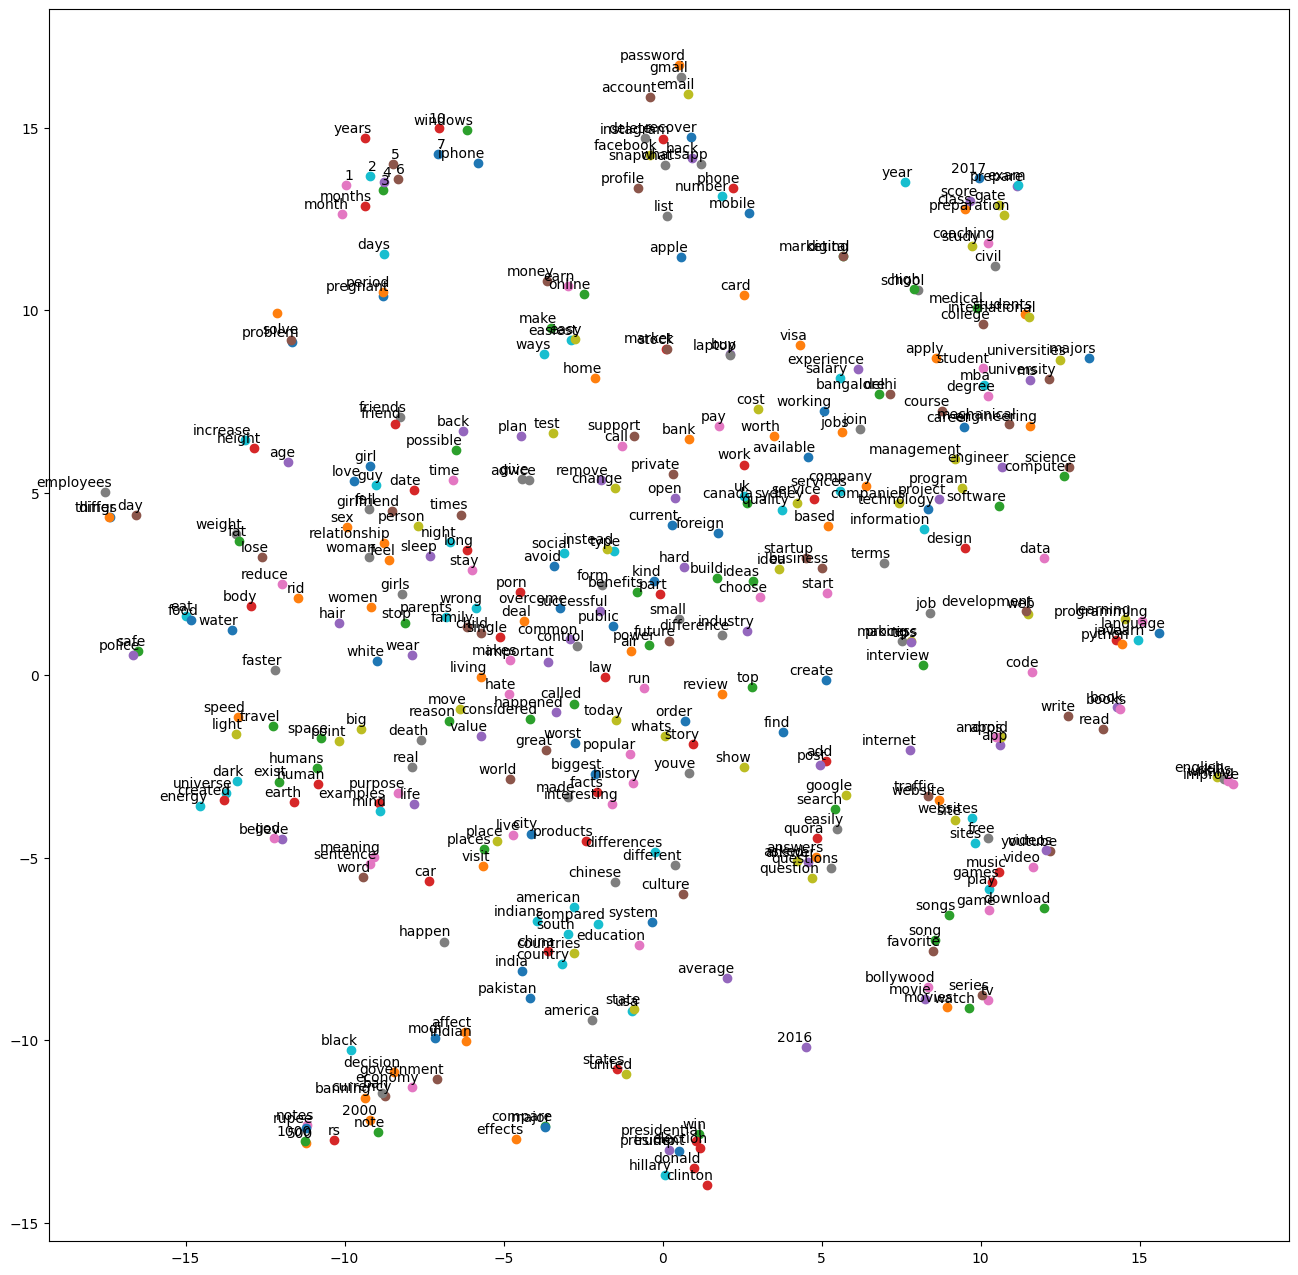

In [12]:
vocab = []
for i in range(0,len(model.wv)):
        vocab.append(model.wv.index_to_key[i])



def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in vocab:
        tokens.append(model.wv[word])
        labels.append(word)
        #print(tokens)
        #print(labels)
    tokens = np.array(tokens)
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)


    
    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
    
    
    
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()
    

tsne_plot(model)
